# 特徴量をどう料理していくか決めるための調査・分析
- 実際の処理はここではしない

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
train = pd.read_csv('input/train.csv')
test  = pd.read_csv('input/test.csv')
gender_submission = pd.read_csv('input/gender_submission.csv')

train.shape, test.shape, gender_submission.shape

((891, 12), (418, 11), (418, 2))

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 各カラムの意味
| 特徴量   | 意味                         | 補足  |
| --------|-----------------------------|------|
| Survived| 生き残ったか | 0 = No, 1 = Yes|
| Pclass| チケットのクラス | 1 = 1st, 2 = 2nd, 3 = 3rd|
| SibSp| 一緒に乗船した兄弟・配偶者の数||
| Parch| 一緒に乗船した親・子どもの数||
| Ticket| チケット番号||
| Fare| 賃料||
| Cabin| 船室番号||
| Embarked| 乗船した港 | C = Cherbourg, Q = Queenstown, S = Southampton|

In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Petterson, Mr. Johan Emil",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Veal, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
print(train.isna().sum())
print('--------')
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# 相関
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


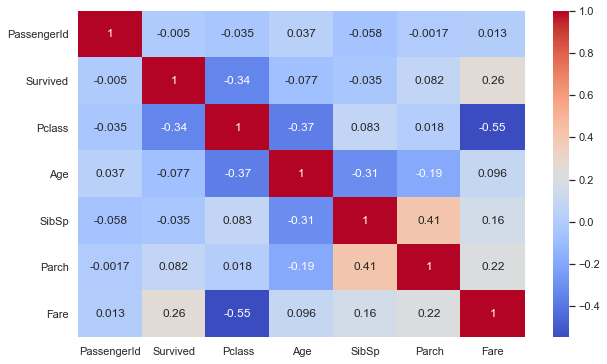

In [25]:
_,ax = plt.subplots(1,1,figsize=(10,6))
sns.heatmap(train.corr(), ax=ax, cmap='coolwarm', annot=True)

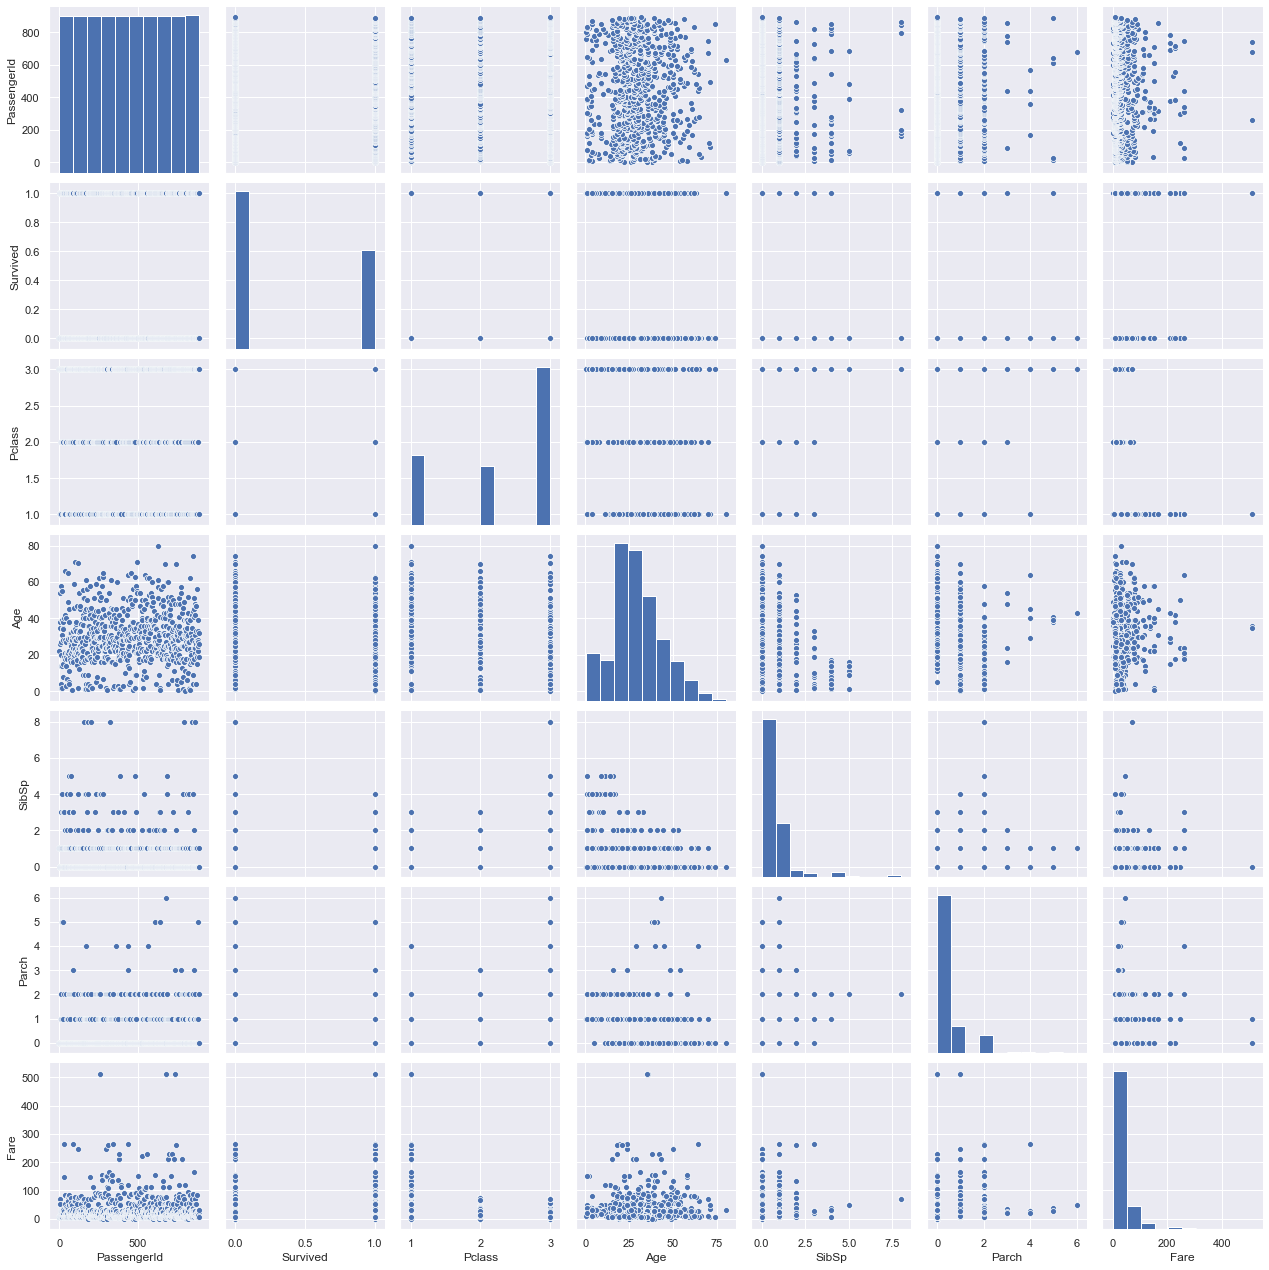

In [35]:
sns.pairplot(train)

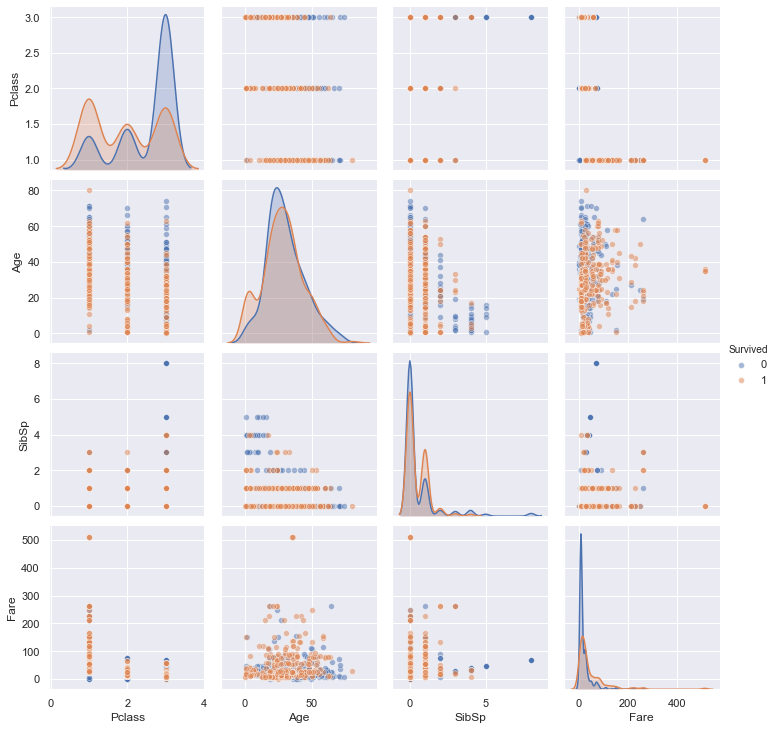

In [34]:
columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']
# columns = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

sns.pairplot(train[columns], hue='Survived', kind='scatter', plot_kws={'alpha':0.5})

## PassengerId
- 落とす
- 単なる通し番号なのでモデルの精度には寄与しないため

## Pclass
- class3は死亡率がかなり高い

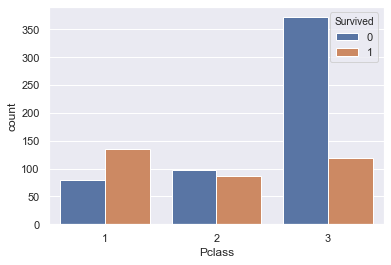

In [33]:
sns.countplot('Pclass', data=train, hue='Survived')
plt.show()

## Name
- Mrとかの敬称から何か得られるかもしれない

## 性別
- 男女でかなり生存率が違う

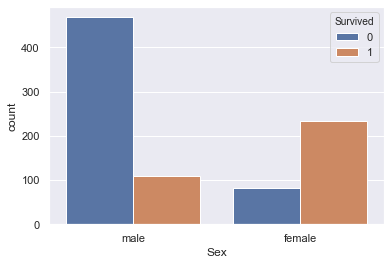

In [35]:
sns.countplot('Sex', data=train, hue='Survived')
plt.show()

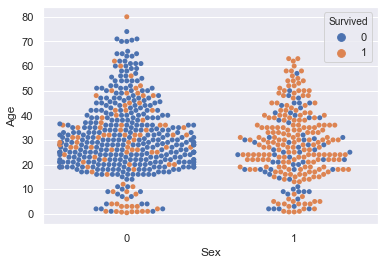

In [45]:
df_mapped = train.copy()
df_mapped['Sex'] = df_mapped['Sex'].map({'male':0, 'female':1})
sns.swarmplot('Sex', 'Age', data=df_mapped, hue='Survived')
plt.show()

## Age

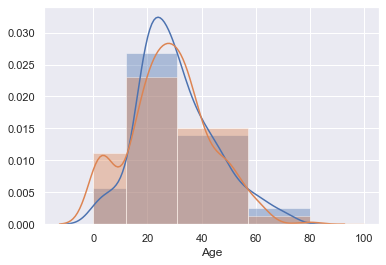

In [58]:
# こんな感じで分割すると良さそう
bins = [0, 12, 31, 57, 80, 100]
sns.distplot(train[train.Survived == 0].Age, bins=bins)
sns.distplot(train[train.Survived == 1].Age, bins=bins)
plt.show()

## SibS

## Parch

## Ticket

## Fare
- いくらで買ったかは生存率には関係ない気がする
- 問題はどのクラスかと客室の位置なのでは
- タダで乗っている(=乗組員？)の生存率は低そう

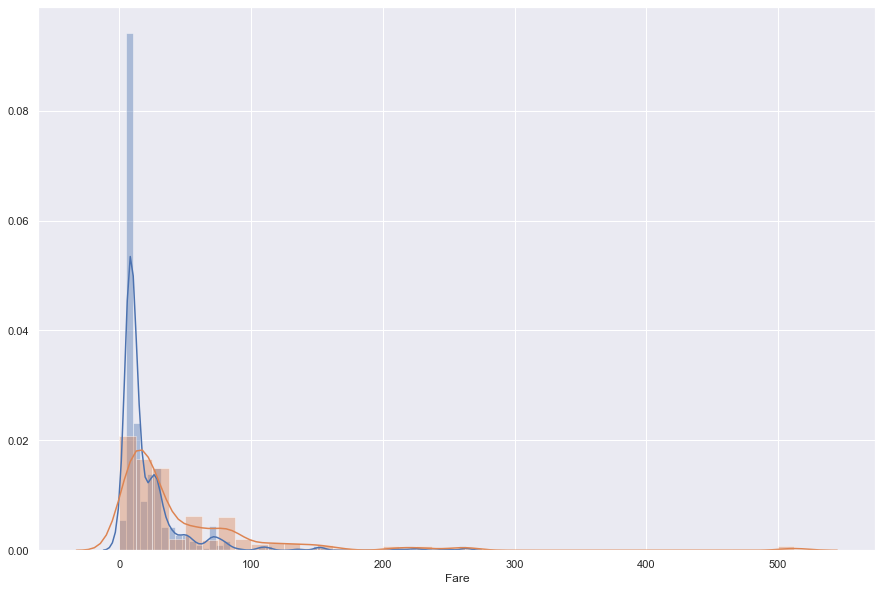

In [10]:
# 外れ値が酷い
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.distplot(train[train.Survived == 0].Fare, ax=ax)
sns.distplot(train[train.Survived == 1].Fare, ax=ax)

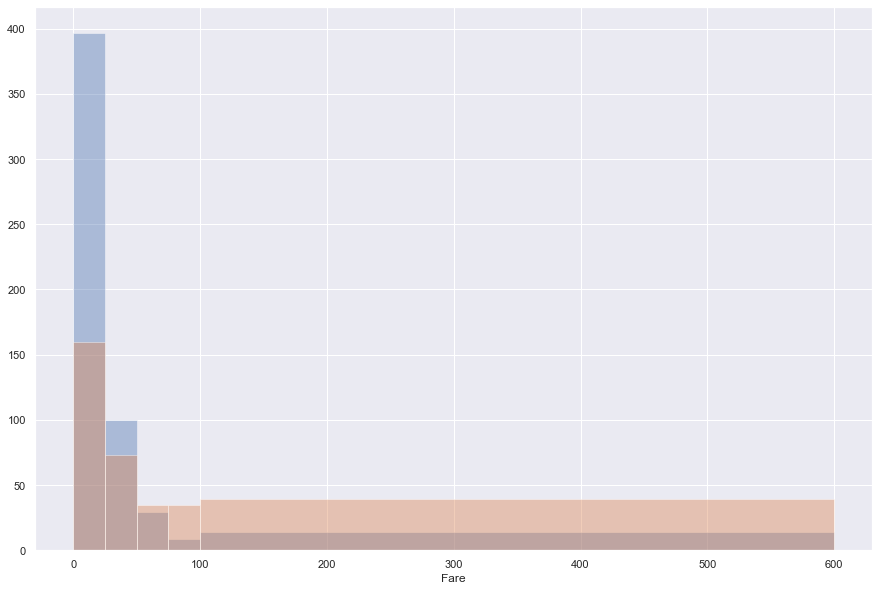

In [11]:
# こんな感じで分割してみる
bins = [0, 25, 50, 75, 100, 600]
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.distplot(train[train.Survived == 0].Fare, bins=bins, kde=None, ax=ax)
sns.distplot(train[train.Survived == 1].Fare, bins=bins, kde=None, ax=ax)
plt.show()

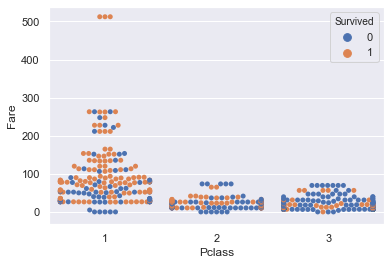

In [46]:
sns.swarmplot('Pclass', 'Fare', data=train, hue='Survived')

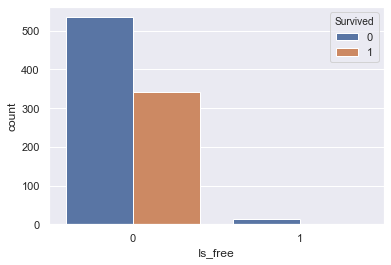

In [48]:
df = train.copy()
df['Is_free'] = df['Fare'].apply(lambda x: x==0)
df['Is_free'] = df['Is_free'].map({True:1, False:0})
sns.countplot('Is_free', data=df, hue='Survived')

## Cabin

In [17]:
# 欠損値が多い
print(pd.isna(train.Cabin).sum(), '/', train.Cabin.size)

# A,B,C,D,E,F,G と Tがある
train[pd.notna(train.Cabin)].Cabin.str[0].value_counts()

687 / 891


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [18]:
# テストはA,B,C,D,E,F,G
test[pd.notna(test.Cabin)].Cabin.str[0].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

## Embarked

# 複数特徴量の組み合わせ

## 家族サイズ
- SibSp + Parch

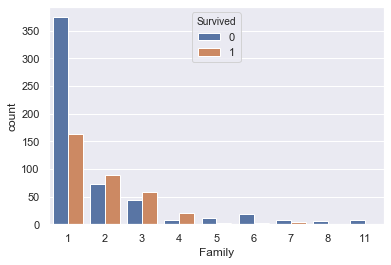

In [9]:
df_fam = train.copy()
df_fam['Family'] = df_fam.SibSp + df_fam.Parch + 1
sns.countplot('Family', data=df_fam, hue='Survived')

## 落とすカラム
- Name : モデル精度に寄与しない
- Cabin : 欠損が多すぎる

## 要検証のカラム
- Ticket : 通し番号なら意味がないけど、同じ番号の乗客が複数いるのでその関係を紐解く
- Embarked : 生存率には関係なさそうだが、念のため確認

In [7]:
train['Ticket'].value_counts().head(20)

CA. 2343        7
347082          7
1601            7
CA 2144         6
347088          6
3101295         6
382652          5
S.O.C. 14879    5
113760          4
LINE            4
19950           4
4133            4
2666            4
347077          4
PC 17757        4
113781          4
W./C. 6608      4
17421           4
349909          4
248727          3
Name: Ticket, dtype: int64

In [8]:
# 家族でまとめてチケットを買ったっぽい
train[train['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [9]:
# こちらは友人同士か？
train[train['Ticket'] == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [10]:
# こちらも家族っぽい
train[train['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


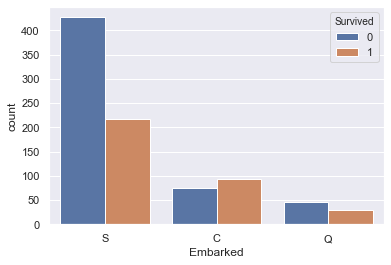

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.013166
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.169718
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.164681
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.032565
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.068900
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.040449
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.032565,0.068900,0.040449,-0.226311,1.000000


In [11]:
sns.countplot(x='Embarked', data=train, hue='Survived')
plt.show()

df_enb = train.copy()
df_enb['Embarked'] = df_enb['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_enb.corr()

In [12]:
print(dict(train['Embarked'].value_counts()))
df_embarked = train.groupby('Embarked').sum()
df_embarked = df_embarked[['Survived']]
df_embarked = pd.concat([df_embarked, train['Embarked'].value_counts()], axis=1)
df_embarked['Survive_rate'] = df_embarked.apply(lambda r: r['Survived'] / r['Embarked'] *100, axis=1)
df_embarked

{'S': 644, 'C': 168, 'Q': 77}


,Survived,Embarked,Survive_rate
C,93,168,55.357143
Q,30,77,38.961039
S,217,644,33.695652


#### Ticket
- 家族や友人などでまとめて買ったチケットが同じ番号になっているように見える
- 船内に知り合いがいるという新たなパラメータを作る際には使えるかもしれない

#### Embarked
- Cherbourgで乗船した乗客の生存率が高い

## 新たな特徴量を生成する検証

In [13]:
# Ticketが同一の番号のグループも知り合いとみなす
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
347088      6
           ..
347083      1
113788      1
350407      1
13049       1
330919      1
Name: Ticket, Length: 681, dtype: int64

In [14]:
train['Ticket'].isna().sum(), test['Ticket'].isna().sum()

(0, 0)

In [15]:
same_tickets_train = train.Ticket.apply(lambda x: train.Ticket.value_counts()[x] - 1)
same_tickets_train.value_counts()

0    547
1    188
2     63
3     44
6     21
5     18
4     10
Name: Ticket, dtype: int64

In [16]:
same_tickets_test = test.Ticket.apply(lambda x: test.Ticket.value_counts()[x] - 1)
same_tickets_test.value_counts()

0    321
1     66
2     18
3      8
4      5
Name: Ticket, dtype: int64

In [17]:
# SibSpとParchを足し合わせて親族の人数としてみる
df_Family = train.copy()
df_Family['Family'] = df_Family.SibSp + df_Family.Parch
df_Family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [18]:
df_Family[['SibSp', 'Parch', 'Family', 'Survived']].corr()

,SibSp,Parch,Family,Survived
SibSp,1.000000,0.414838,0.890712,-0.035322
Parch,0.414838,1.000000,0.783111,0.081629
Family,0.890712,0.783111,1.000000,0.016639
Survived,-0.035322,0.081629,0.016639,1.000000


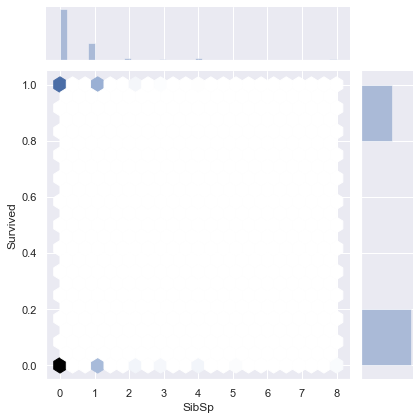

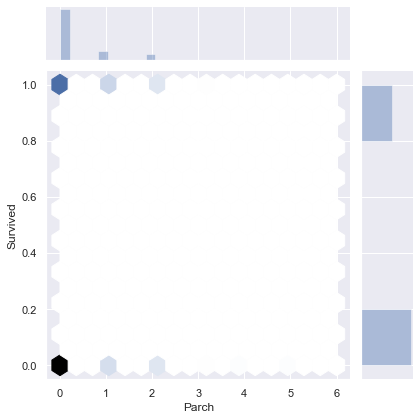

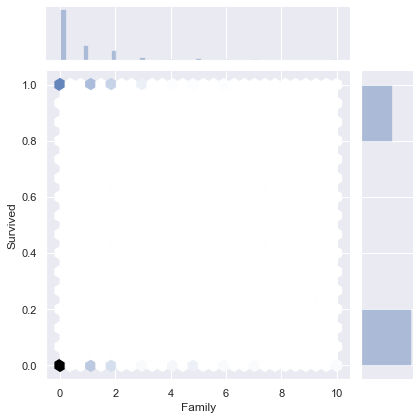

In [19]:
labels = ['SibSp', 'Parch', 'Family']

for index,label in enumerate(labels, start=1):
    sns.jointplot(label, 'Survived', df_Family, kind='hex')